In [13]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

In [2]:
image_file = "/home/jordan/github/chaimeleon_open_challenges_rcjh/datasets/train_lung/case_0094/case_0094.nii.gz"

In [3]:
nifti_image = nib.load(image_file)
nii_data_raw = nifti_image.get_fdata()
nii_data_raw.shape

(512, 512, 512)

In [4]:
gb = 64
nii_data = nii_data_raw[gb // 2 : -gb // 2, gb:-gb, gb // 2 : -gb // 2]
nii_data.shape

(448, 384, 448)

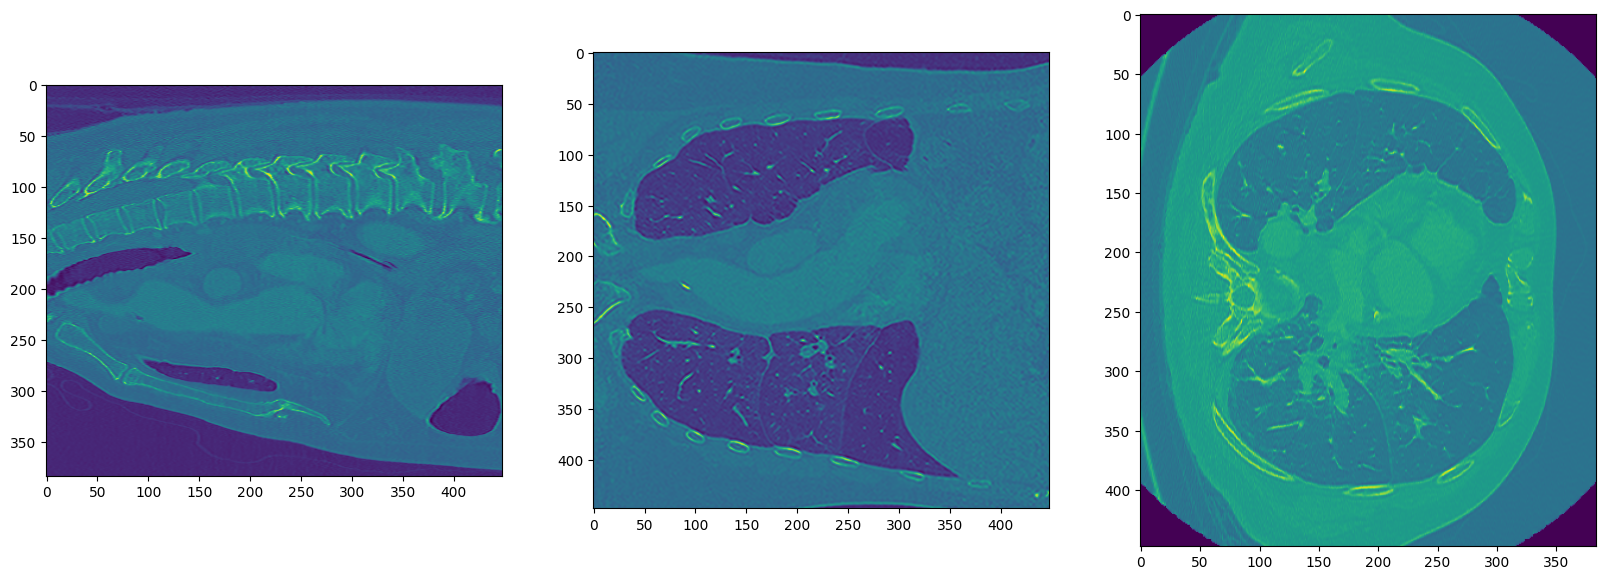

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 15))
cur_ind = 224
ax[0].imshow(nii_data[cur_ind, :, :])
ax[1].imshow(nii_data[:, cur_ind, :])
ax[2].imshow(nii_data[:, :, cur_ind])

In [14]:
image = sitk.ReadImage(image_file)
mha_image = sitk.GetArrayFromImage(image)
mha_image = np.transpose(mha_image, (2, 1, 0))

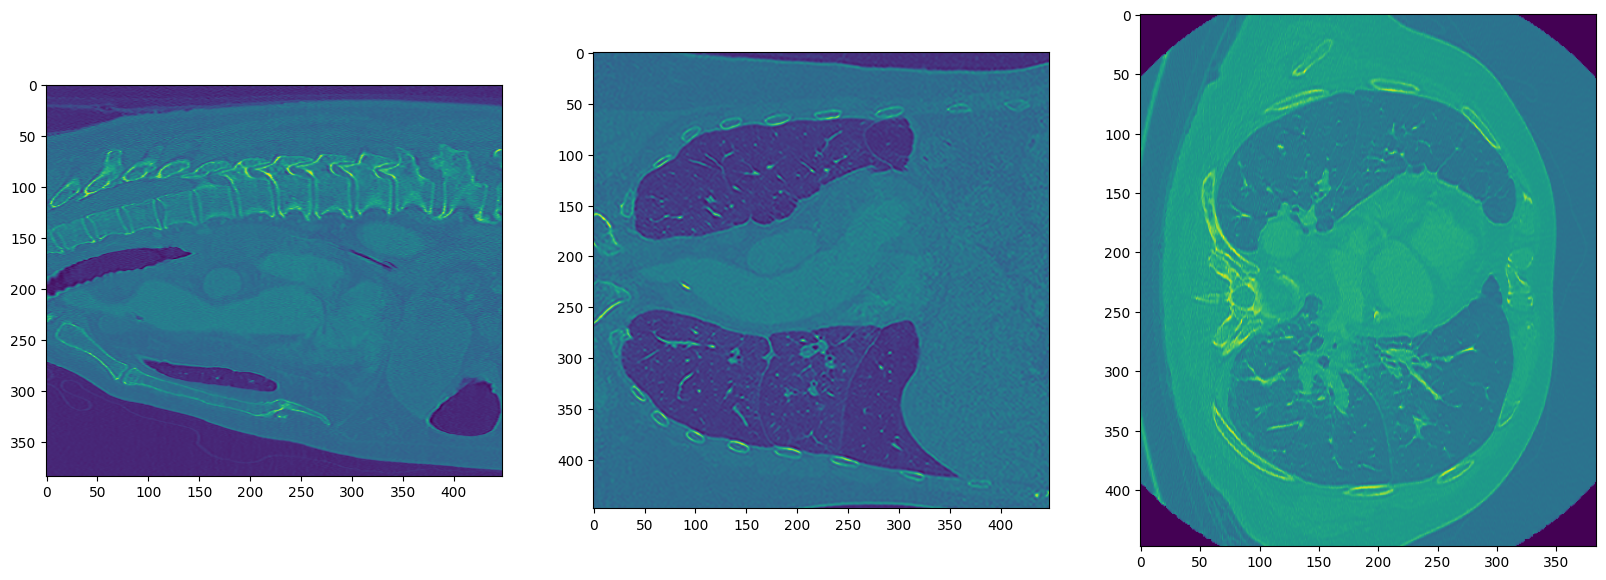

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 15))
cur_ind = 224
gb = 64
mha_data = mha_image[gb // 2 : -gb // 2, gb:-gb, gb // 2 : -gb // 2]
ax[0].imshow(mha_data[cur_ind, :, :])
ax[1].imshow(mha_data[:, cur_ind, :])
ax[2].imshow(mha_data[:, :, cur_ind])

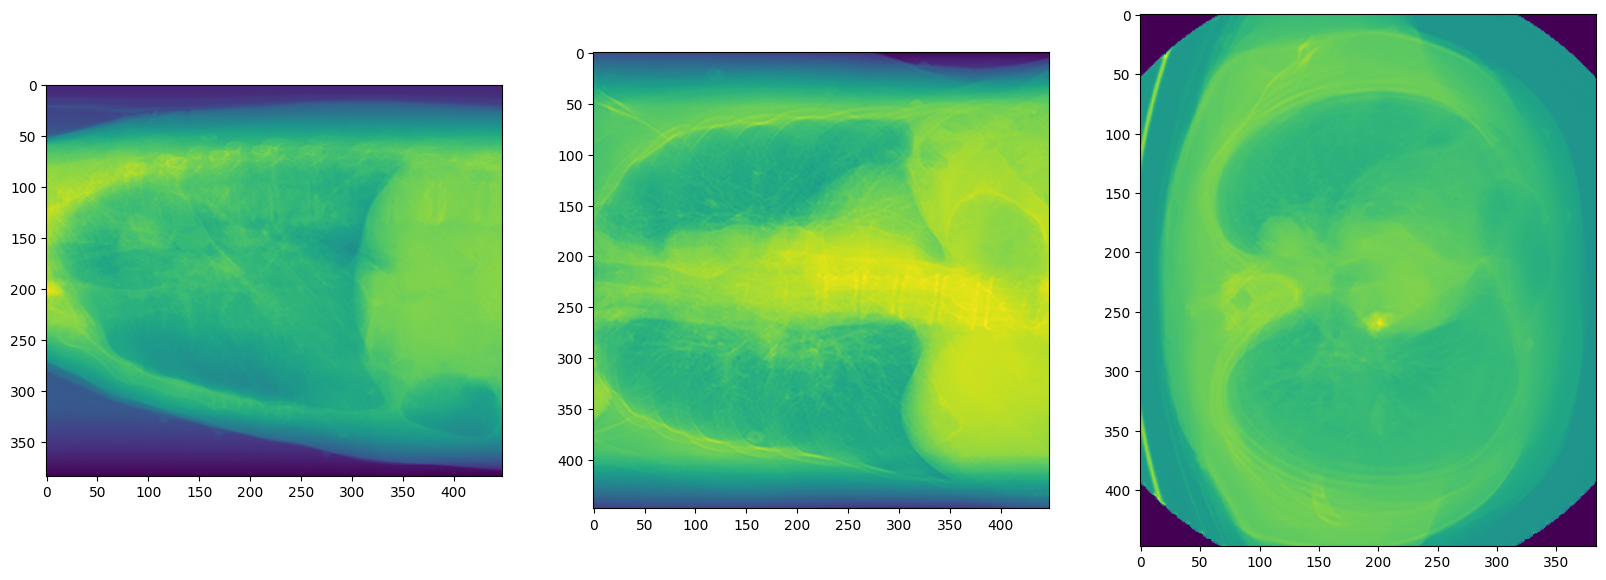

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 15))
cur_ind = 256
ax[0].imshow(np.mean(nii_data, axis=0))
ax[1].imshow(np.mean(nii_data, axis=1))
ax[2].imshow(np.mean(nii_data, axis=2))

In [10]:
axis_chunks = {}
for a in range(3):
    nii_chunks = []
    for k in range(3):
        u = int(np.ceil((k + 1) * (nii_data.shape[a] / 3)))
        l = int(np.floor((k) * (nii_data.shape[a] / 3)))
        if a == 0:
            nii_chunk = np.mean(nii_data[l:u, :, :], axis=a)
        elif a == 1:
            nii_chunk = np.mean(nii_data[:, l:u, :], axis=a)
        elif a == 2:
            nii_chunk = np.mean(nii_data[:, :, l:u], axis=a)
        nii_chunk = (
            (nii_chunk - nii_chunk.min()) / (nii_chunk.max() - nii_chunk.min())
        ) * 255
        nii_chunks.append(nii_chunk)
    nii_chunked_image = np.array(nii_chunks)
    nii_chunked_image = np.transpose(nii_chunked_image, (1, 2, 0))
    axis_chunks[a] = nii_chunked_image

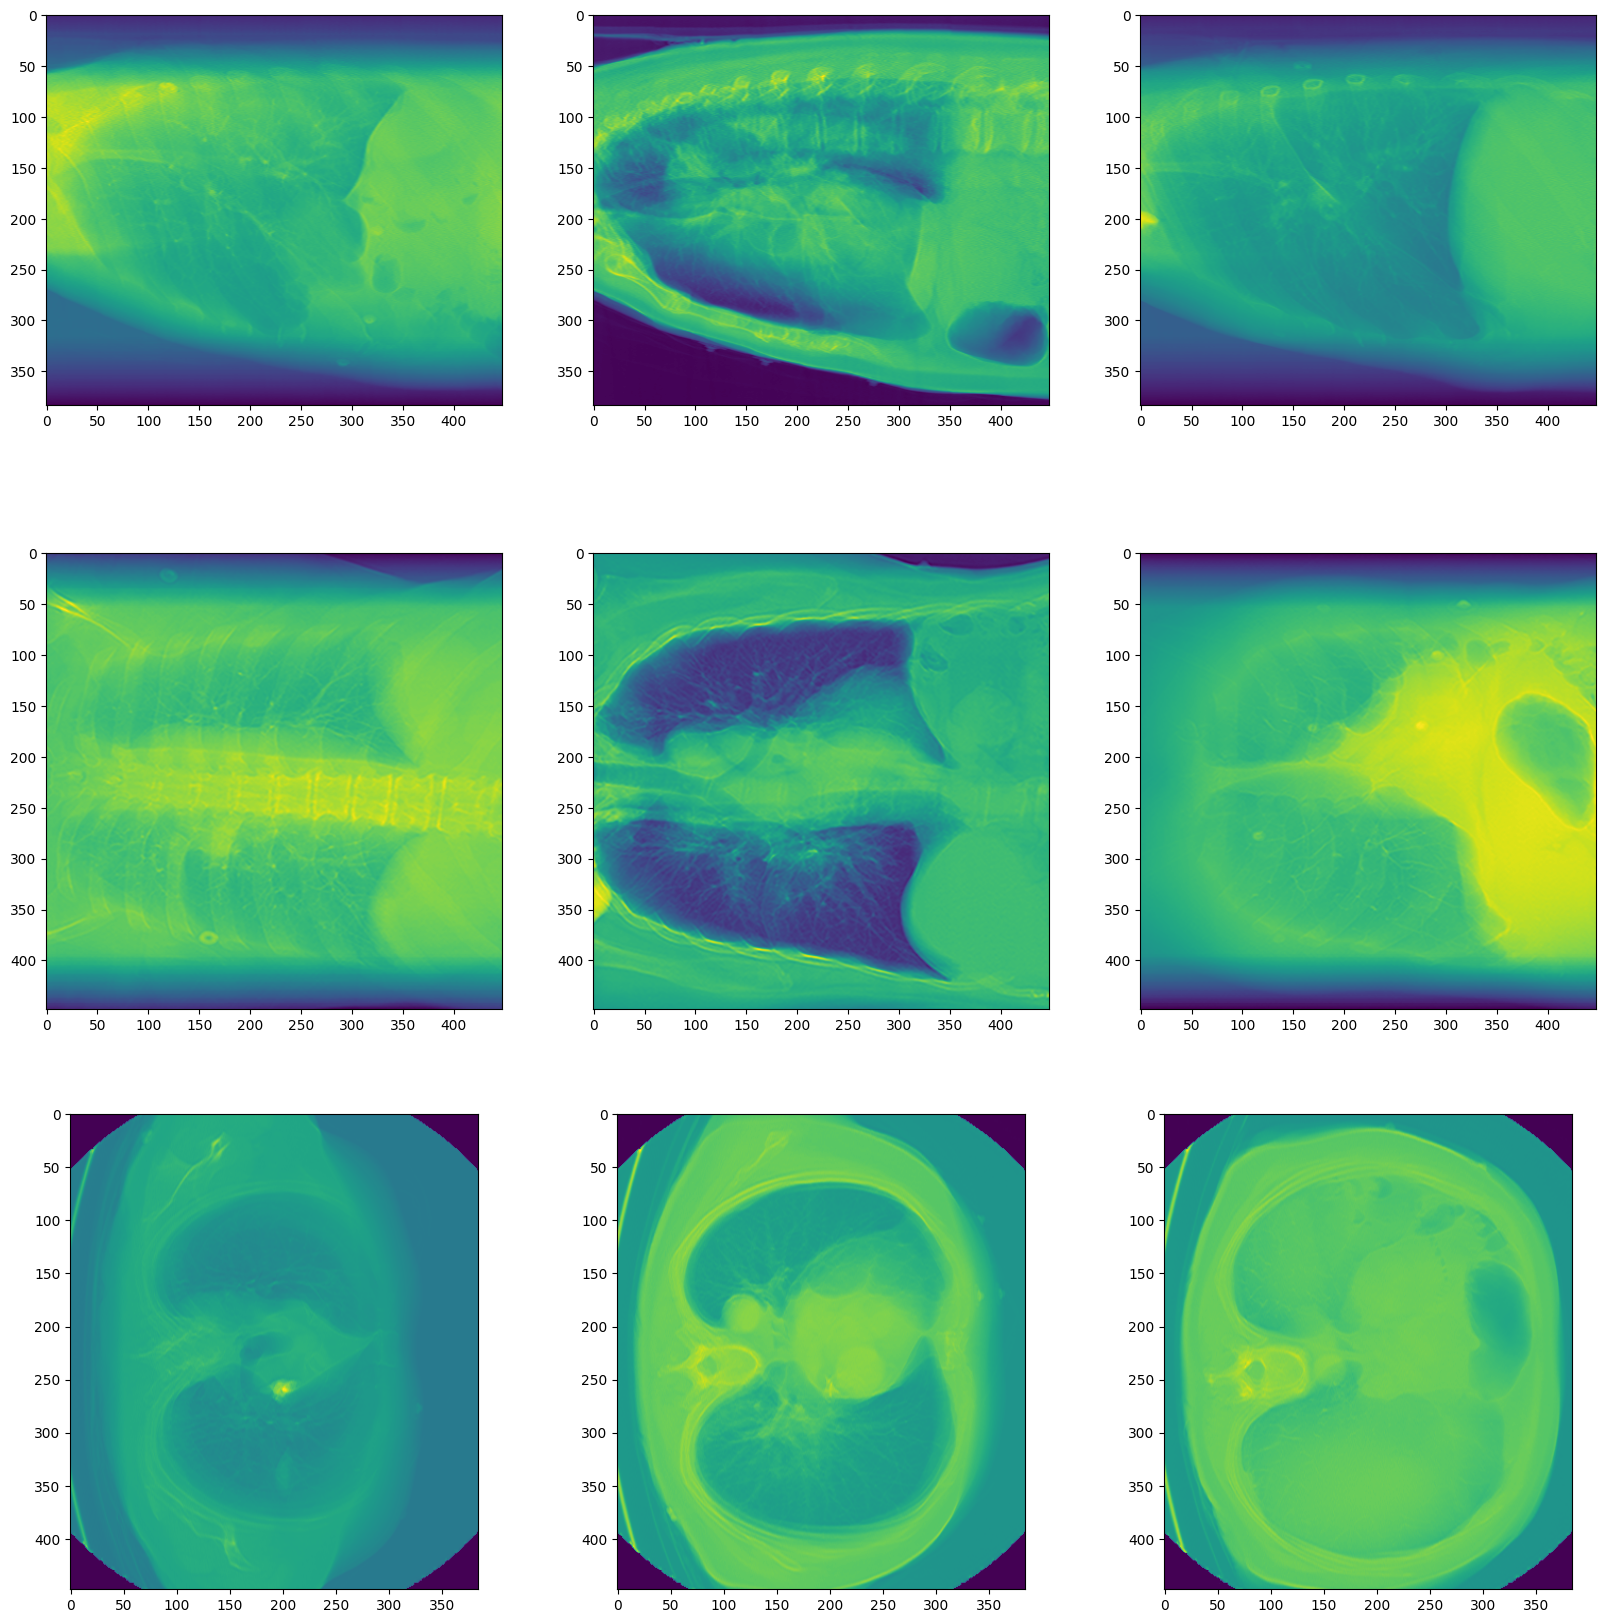

In [11]:
fig, ax = plt.subplots(figsize=(20, 21), ncols=3, nrows=3)
for a, nii_chunked_image in axis_chunks.items():
    ax[a, 0].imshow(nii_chunked_image[:, :, 0])
    ax[a, 1].imshow(nii_chunked_image[:, :, 1])
    ax[a, 2].imshow(nii_chunked_image[:, :, 2])